##### Install libraries:

In [ ]:
# google trends
!pip3 install pytrends
#/google trends

# vector models
!pip3 install -U sentence-transformers
!pip3 install bert-extractive-summarizer
#/vector models

# facebook prophet
!pip3 install prophet
# facebook prophet

# web parsing
!pip3 install html2text
!pip3 install requests_html
!pip3 install newspaper3k
!pip3 install PyDrive

!pip3 install google-api-python-client
!pip3 install yake
#/web parsing

# telegram
!pip3 install telegram
!pip3 install python-telegram-bot
!pip3 install wordfreq
#/telegram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=2b16ec8622fb594cabfa4e42dae14c7a32412536d8289259ba7a5fd1a6982400
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 4.7 MB 37.5 MB/s 
     |████████████████████████████████| 1.3 MB 80.6 MB/s 
     |████████████████████████████████| 120 kB 68.1 MB/s 
     |████████████████████████████████| 6.6 MB 43.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=403f399bdd67249fa9e1f84d4a8bc18440085f9eda794e541e3c97ab930337d0
  Stored in directory: /root/.cache/pip/whee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56.8 MB 1.1 MB/s 
     |████████████████████████████████| 53 kB 1.1 MB/s 


##### Import libraries:

In [ ]:
# facebook prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet import Prophet
#/facebook prophet

# google trends
from pytrends.request import TrendReq
#/google trends

# general libraries
import matplotlib.pyplot as plt
import pandas as pd
#/general libraries

# text embeddings
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
#/text embeddings

# text simplification
from itertools import chain
from nltk.corpus import wordnet
from wordfreq import word_frequency

import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#/text simplification

# general
import time, random, sys, os
from random import randint
import itertools
import math
#/general

# datetime
import datetime
from datetime import datetime
import dateutil.relativedelta
#/datetime

# parallel calculations
from tqdm import tqdm
from multiprocessing import Pool
#/parallel calculations

# text processing
import re
import string
from collections import Counter
#/text processing

# telegram
import telegram
#/telegram

# arrays and frames
import numpy as np
import pandas as pd
import spacy

import shutil
pd.options.mode.chained_assignment = None
#/arrays and frames

# mail sending
import smtplib
from email.message import EmailMessage
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
#/mail sending

# pandas progress
tqdm.pandas()
#/pandas progress

# summarization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
#/summarization

# web parsing
from bs4 import BeautifulSoup
from bs4.element import Tag
from requests import get
import urllib.request

from newspaper import Article
import newspaper

import requests
import urllib
from bs4 import BeautifulSoup as bs
import html2text

from requests_html import HTML
from requests_html import HTMLSession
from fake_useragent import UserAgent

import json

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

from google.colab import auth
from google.colab import drive
#/web parsing

# web driver
from openpyxl import load_workbook
#/web driver

# named recognition
from transformers import pipeline
import yake
#/named recognition

# google api
from googleapiclient.discovery import build
#/google api

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##### Feature toggles:

In [ ]:
youtube_scale = False

##### UDFs:

In [ ]:
##### Semantic similarity
def get_cosinus(x,y):
  sentences = [x, y]
  sentence_embeddings = model.encode(sentences)
  cos = round(list(cosine_similarity([sentence_embeddings[0]], sentence_embeddings[1:])[0])[0],2)
  
  return cos

def longest_common_substring(s1, s2):
  m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
  longest, x_longest = 0, 0
  for x in range(1, 1 + len(s1)):
    for y in range(1, 1 + len(s2)):
      if s1[x - 1] == s2[y - 1]:
        m[x][y] = m[x - 1][y - 1] + 1
        if m[x][y] > longest:
          longest = m[x][y]
          x_longest = x
      else:
        m[x][y] = 0
  return s1[x_longest - longest: x_longest]

def longest_common_sentence(s1, s2):
    s1_words = s1.split(' ')
    s2_words = s2.split(' ')
    return ' '.join(longest_common_substring(s1_words, s2_words))

def css(a,b):
    if len(a.split()) > 0:
        score = len(longest_common_sentence(a,b).split())/len(a.split())
    else:    
        score = 0
    return score
#####/Semantic similarity

##### Check web page existance
def url_ok(url):
    r = requests.head(url)
    return r.status_code == 200
#####/Check web page existance

##### Google search
def get_results(query, i, t):
    query = urllib.parse.quote_plus(query)
    z = get_source("https://www.google.com/search?q=" + "site:https://" + str(t) + " " + query.lower() + "&num=" + str(100) + "&start=" + str(i+1))
    return z

def get_source(url):
    try:
        session = HTMLSession()
        response = session.get(url)
        return response

    except requests.exceptions.RequestException as e:
        print(e)

def scrape_google(x):

    query = urllib.parse.quote_plus(x)

    response = get_source(x)

    links = list(response.html.absolute_links)

    google_domains = ('https://www.google.', 
                      'https://google.', 
                      'https://webcache.googleusercontent.', 
                      'http://webcache.googleusercontent.', 
                      'https://policies.google.',
                      'https://support.google.',
                      'https://maps.google.')

    for url in links[:]:
        if url.startswith(google_domains):
            links.remove(url)

    return links

def get_searches(query, i, t):
  time.sleep(randint(10,20))
  z = scrape_google("https://www.google.com/search?q=" + "site:https://" + str(t) + " " + query.lower() + "&num=" + str(100) + "&start=" + str(i+1))
  return z

def parse_results(response):
  
  titles, links = [], []
    
  css_identifier_result = ".tF2Cxc"
  css_identifier_title = "h3"
  css_identifier_link = ".yuRUbf a"
  css_identifier_text = ".IsZvec"
    
  results = response.html.find(css_identifier_result)

  output = []
    
  for result in results:
    titles.append(result.find(css_identifier_title, first=True).text)
    links.append(result.find(css_identifier_link, first=True).attrs['href'])
        
  response = (titles, links)
  
  return response

def google_search(query, i, t):
    time.sleep(randint(5,10))
    response = get_results(query, i, t)
    return parse_results(response)
#####/Google search

##### Load language model:

In [ ]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

##### Requested topics:

In [ ]:
topic = 'how to earn money'

##### Forecast scale, months:

In [ ]:
forecast_scale = 24

##### Get trend data:

In [ ]:
pytrend = TrendReq()

if youtube_scale is True:
  pytrend.build_payload(kw_list=[topic], timeframe='all', gprop='youtube')
else:
  pytrend.build_payload(kw_list=[topic], timeframe='all')

df = pytrend.interest_over_time()
df.reset_index(inplace=True)

df = df[['date', topic]]
df.resample('M', on='date').sum()
df.reset_index(inplace=True)

df = df[['date', topic]]
df.columns = ['ds', 'y']

##### Make forecast:

In [ ]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=forecast_scale , freq='M') 
forecast = m.predict(future)

predicted_growth = round(list(forecast['yhat'][-forecast_scale:])[-1]/list(forecast['yhat'][-forecast_scale:])[0], 1)

cv_results = cross_validation(model = m, period = 12, horizon = 24) 
perfomance = performance_metrics(cv_results)

print('\n')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6asicrbx/551v_jnl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6asicrbx/3ycob90z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38404', 'data', 'file=/tmp/tmp6asicrbx/551v_jnl.json', 'init=/tmp/tmp6asicrbx/3ycob90z.json', 'output', 'file=/tmp/tmpk9b__70x/prophet_model-20220902121045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 212 forecasts with cutoffs between 2004-12-

  0%|          | 0/212 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6asicrbx/tkymn7ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6asicrbx/w7l3o6qb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76467', 'data', 'file=/tmp/tmp6asicrbx/tkymn7ig.json', 'init=/tmp/tmp6asicrbx/w7l3o6qb.json', 'output', 'file=/tmp/tmp0ncqiw1z/prophet_model-20220902121047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6asicrbx/vqh3o0_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6asicrbx/10fa

##### Show chart:

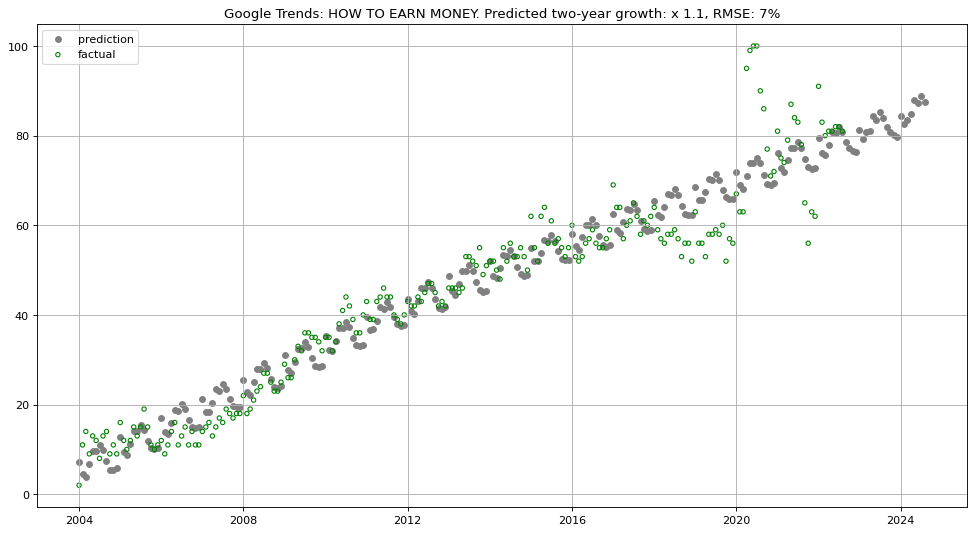

In [ ]:
fig = plt.figure(figsize=(15,8), dpi=80)

plt.scatter(forecast['ds'], forecast['yhat'], s=27, color='gray', label="prediction")
plt.scatter(df['ds'], df['y'], s=15, color='green', label="factual", facecolors='none')

# plt.scatter(forecast['ds'], forecast['yhat_lower'], color='gray', s=2)
# plt.scatter(forecast['ds'], forecast['yhat_upper'], color='gray', s=2)

plt.legend(loc="upper left")
plt.title('Google Trends: ' + topic.title().upper() + '. ' + 'Predicted two-year growth: x ' + str(predicted_growth) + ', RMSE: ' + str(int(list(perfomance['rmse'])[0])) + '%')

plt.grid()
fig.savefig('trend.png', dpi=fig.dpi)
plt.show()